# 프로젝트 (1) load_digits : 손글씨를 분류해봅시다

- 첫번째 실습 : 손글씨 이미지를 제대로 0~9까지 열 가지 카테고리로 분류해 보는 실습을 진행해보자


- Scikit-Learn 라이브러리의 datasets를 모듈 안의 load_digits 매서드을 사용해서 프로젝트를 진행


- Scikit-Learn 라이브러리의 버전을 먼저 확인해보자.

In [1]:
import sklearn
print(sklearn.__version__)

1.0


---
### (1) 필요한 모듈 import 하기
---

In [1]:
from sklearn.datasets import load_digits  # 실습파일 불러오기
from sklearn.model_selection import train_test_split  # model_selection 모듈 안의 Train / Test Set을 나누기 위한 함수 불러오기
from sklearn.metrics import classification_report  # metrics 모듈 안의 학습 모델을 평가하기 위한 함수 불러오기
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd  # pandas 모듈 불러오기
import numpy as np   # numpy 모듈 불러오기
import matplotlib.pyplot as plt

---
### (2) 데이터 준비
---

In [2]:
digits = load_digits()  # load_digits 매서드를 사용해서 digits 데이터 불러옴
type(digits)  # digits의 타입을 구하면 파이썬 딕셔너리, 번치(bunch) 객체로 표현됨

sklearn.utils.Bunch

- `digits.keys()` 매서드를 사용해서 `digit` 객체 안의 정보 확인해보자


- `digits` 안에는 7가지 정보들이 담겨있는것을 확인할 수 있다.

In [5]:
digits.keys()  # digits의 속성 확인하기

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

* `digit`의 데이터를 파악하기 위해 pandas 모듈의 DataFrame을 활용해보자

In [84]:
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df['label'] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [97]:
digits_df['label'].value_counts()  # digits의 target 값 중 unique한 값들의 중복되는 갯수는 다음과 같다.

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

* `digits`의 feature data의 크기는 1797x64이며 총 1797개의 샘플 데이터가 있으며 64개의 특성을 갖는다는 말임.


* 여기서, 64개의 특성이란? 각 행이 하나의 이미지를 나타내고 있으며 8x8 크기의 이미지를 나타냄

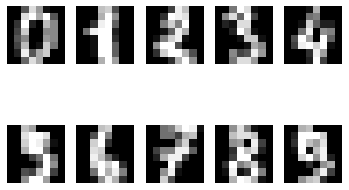

In [39]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

---
### (3) 데이터 이해하기
---

**1) Feature Data 지정하기**


In [16]:
digits_data = digits.data  # Feature Data 지정
print(digits_data.shape)   # Feature Data의 모양 출력
print(type(digits_data))   # Feature Data의 객체 타입 출력

(1797, 64)
<class 'numpy.ndarray'>


**2) Label Data 지정하기**

In [20]:
digits_label = digits.target  # Label Data 지정
print(digits_label.shape)     # Label Data의 모양 출력
print(type(digits_label))     # Label Data의 객체 타입 출력

(1797,)
<class 'numpy.ndarray'>


**3) Target Names 출력해보기**

In [22]:
digits_target_names = digits.target_names
print(digits_target_names)

[0 1 2 3 4 5 6 7 8 9]


**4) 데이터 Describe 해보기**

In [24]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

---
### (4) train, test 데이터 분리
---

- 모델 학습과 테스트용 문제지와 정답지를 준비해보자.
    - `train_test_split` 함수를 사용하여 Data를 학습 : 테스트의 비율을 8:2로 골고루 섞이도록 나눠보자


In [107]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=1111)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


- 아래 셀의 결과를 확인하면 나누어진 Test Data가 전체 Data에서 골고루 섞여져 있는 것으로 확인된다.

In [108]:
unique, counts = np.unique(y_test, return_counts=True)
list(zip(unique, counts))


[(0, 34),
 (1, 43),
 (2, 36),
 (3, 37),
 (4, 42),
 (5, 29),
 (6, 41),
 (7, 36),
 (8, 36),
 (9, 26)]

---
### (5) 다양한 모델로 학습시켜보기
---

- 1) **Decision Tree** 사용해 보기<br>
- 2) **Random Forest** 사용해 보기<br>
- 3) **SVM** 사용해 보기<br>
- 4) **SGD Classifier** 사용해 보기<br>
- 5) **Logistic Regression** 사용해 보기<br>

In [109]:
# 학습모델 불러오기 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [110]:
# 학습모델을 각각의 변수에 저장

decision_tree = DecisionTreeClassifier(random_state=1111)
random_forest = RandomForestClassifier(random_state=1111)
svm_model = svm.SVC()
sgd_model = SGDClassifier()
logistic_model = LogisticRegression()

In [111]:
# 각각의 모델을 Train Data set로 학습

decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
# Test Data를 통해 학습모델의 결과값 예측

prediction_decision_tree = decision_tree.predict(X_test)
prediction_random_forest = random_forest.predict(X_test)
prediction_svm_model = svm_model.predict(X_test)
prediction_sgd_model = sgd_model.predict(X_test)
prediction_logistic_model = logistic_model.predict(X_test)

---
### (6) 모델을 평가해 보기
---

- **1) sklearn.metrics accuracy 지표를 사용한 경우**

In [113]:
print(accuracy_score(y_test, prediction_decision_tree))
print(accuracy_score(y_test, prediction_random_forest))
print(accuracy_score(y_test, prediction_svm_model))
print(accuracy_score(y_test, prediction_sgd_model))
print(accuracy_score(y_test, prediction_logistic_model))

0.8055555555555556
0.9666666666666667
0.9833333333333333
0.9388888888888889
0.9666666666666667


- **2) sklearn.metrics classification_report 지표를 사용한 경우**

In [114]:
print(classification_report(y_test, prediction_decision_tree), end='------------------------------------------------------------\n\n')
print(classification_report(y_test, prediction_random_forest), end='------------------------------------------------------------\n\n')
print(classification_report(y_test, prediction_svm_model), end='------------------------------------------------------------\n\n')
print(classification_report(y_test, prediction_sgd_model), end='------------------------------------------------------------\n\n')
print(classification_report(y_test, prediction_logistic_model), end='------------------------------------------------------------\n\n')

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.78      0.81      0.80        43
           2       0.74      0.72      0.73        36
           3       0.86      0.86      0.86        37
           4       0.90      0.86      0.88        42
           5       0.84      0.90      0.87        29
           6       0.85      0.85      0.85        41
           7       0.84      0.89      0.86        36
           8       0.61      0.53      0.57        36
           9       0.68      0.65      0.67        26

    accuracy                           0.81       360
   macro avg       0.80      0.80      0.80       360
weighted avg       0.80      0.81      0.80       360
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.91      1.00      0.96        43
           2     

- **3) sklearn.metrics confusion_matrix 지표를 사용한 경우**

In [83]:
print(confusion_matrix(y_test, prediction_decision_tree), end='\n\n')
print(confusion_matrix(y_test, prediction_random_forest), end='\n\n')
print(confusion_matrix(y_test, prediction_svm_model), end='\n\n')
print(confusion_matrix(y_test, prediction_sgd_model), end='\n\n')
print(confusion_matrix(y_test, prediction_logistic_model))

[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  5  4  1  1  0  3  0 28  1]
 [ 0  1  1  2  2  1  0  0  0 25]]

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  3  0  0  1  1  0  2 36  0]
 [ 0  0  0  0  0  2  0  0  0 30]]

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  0  0  1  0  0  0 31]]

[[42

---
### (7) 결론
---

- `프로젝트(1) load_digits : 손글씨를 분류해봅시다`에서는 0부터 9까지의 손글씨 데이터 샘플을 가지고 (8x8) 크기의 이미지를 벡터화한 데이터를 가지고 학습 및 평가를 하기위한 **지도학습 - 분류 문제**라 할 수 있다. 


- 총 1797개의 Data Sample 중 필자는 train_test_split 함수를 이용하여 Data Sample을 8:2 비율로 균등하게 나누었다. 아래 그림과 같이 Data Sample의 데이터들의 치우침 정도를 확인하기 위해 pandas DataFrame의 매소드 value_counts()를 사용하였다.<br> **※ 데이터가 불균형(imbalance) 하지 않음을 확인하였다**


![image](https://user-images.githubusercontent.com/103712369/165583188-ec5f0690-2017-493a-b41b-0fd11681add2.png)


- 본 노드를 통해 배운 Scikit-Learn에서 제공하는 평가지표 함수는 accuracy / classification_report / confusion_matrix가 있었는데 confusion_matrix의 성능지표 중 가장 많이 사용되는 Precision / Recall을 사용하기에는 데이터가 고루 분포되어 있기 때문에 **Accuracy 성능지표를 사용하여 학습모델을 평가하는것이 바람직하다고 생각된다.**


- 모델은 **SVM(Support Vector Machine)**을 사용했을 때 약 98%로 가장 좋은 성능을 보였다. 


- sklearn.metrics 모듈 중 classification_report를 사용하면 아래 그림과 같이 label 별로 Precision, Recall, f1 스코어를 확인할 수 있으며 accuracy 정보 또한 확인이 가능하여 매우 유용하다.
![image](https://user-images.githubusercontent.com/103712369/165576153-96ef5d77-4563-4bfa-81ea-1715d71cb2c8.png)